# data assignment research question

TODO:
- find a research question and do it
- combine 2 categories
- pivot using country categories
- fix hist to make them more meaningful
- make viz beautiful

## CCUS: Carbon capture, utilization and storage

Data source: IEA (2024), CCUS Projects Database, https://www.iea.org/data-and-statistics/data-product/ccus-projects-database


## Research question


?


## Hypothesis


Null hypothesis (H<sub>0</sub>): there is no statistical discernible difference between

Alternative hypothesis (H<sub>A</sub>): there is a statistical discernible difference between


## Data cleaning


In [119]:
import numpy as np
import pandas as pd


df = pd.read_csv("data/ccus.csv")
df

,Project name,ID,Country,Partners,Project type,Announcement,FID,Operation,Suspension/decommissioning,Project Status,...,Ref 5,Ref 6,Ref 7,Link 1,Link 2,Link 3,Link 4,Link 5,Link 6,Link 7
0,3D DMX ArcelorMittal and IFPEN Dunkirk (full-s...,1,France,"ArcelorMittal, ifp, Axens, Uetikon, Grassco, b...",Capture,2019.0,NaN,2025.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
1,3D DMX ArcelorMittal and IFPEN Dunkirk 'REUZE',751,France,"ArcelorMittal, Engie, Infinium",CCU,2022.0,2024.0,2025.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
2,7 Blue Ammonia Facility,1055,Qatar,"QAFCO, thyssenkrupp Uhde/Consolidated Contract...",Full Chain,2022.0,2022.0,2026.0,NaN,Under construction,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
3,8Rivers H2 (8RH2) (WY),3,United States,"8Rivers, Wyoming Energy Authority",Capture,2022.0,NaN,NaN,NaN,Planned,...,NaN,NaN,NaN,Link 1,NaN,NaN,NaN,NaN,NaN,NaN
4,Abadi CCS/CCUS,227,Indonesia,"Inpex Masela 65%, Shell (trying to find a buye...",Full chain,2018.0,NaN,2027.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,Link 3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Yara Pilbara ammonia,788,Australia,"Yara, JERA",Capture,2021.0,NaN,NaN,NaN,Planned,...,NaN,NaN,NaN,Link 1,NaN,NaN,NaN,NaN,NaN,NaN
840,Yara Sluiskil fertiliser,465,Netherlands,Yara,Capture,2022.0,2023.0,2026.0,NaN,Under construction,...,NaN,NaN,NaN,Link 1,Link 2,Link 3,NaN,NaN,NaN,NaN
841,Yara-BASF Gulf Coast,826,United States,"Yara, BASF",Capture,2023.0,NaN,2028.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,NaN,NaN,NaN,NaN,NaN,NaN
842,ZerCal250,640,United Kingdom,"Origin, Singleton Birch",Capture,2021.0,NaN,NaN,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN


In [120]:
df.columns

Index(['Project name', 'ID', 'Country', 'Partners', 'Project type',
       'Announcement', 'FID', 'Operation', 'Suspension/decommissioning',
       'Project Status', 'Project phase', 'Announced capacity (Mt CO2/yr)',
       'Estimated capacity by IEA (Mt CO2/yr)', 'Sector', 'Fate of carbon',
       'Part of CCUS hub', 'Region', 'Ref 1', 'Ref 2', 'Ref 3', 'Ref 4',
       'Ref 5', 'Ref 6', 'Ref 7', 'Link 1', 'Link 2', 'Link 3', 'Link 4',
       'Link 5', 'Link 6', 'Link 7'],
      dtype='object')

Drop columns which are not relevant for analysis, such as the name of the company.


In [121]:
df = df.drop(
    columns=[
        "Project name",
        "Partners",
        "Part of CCUS hub",
        "Ref 1",
        "Ref 2",
        "Ref 3",
        "Ref 4",
        "Ref 5",
        "Ref 6",
        "Ref 7",
        "Link 1",
        "Link 2",
        "Link 3",
        "Link 4",
        "Link 5",
        "Link 6",
        "Link 7",
    ]
)

df.head(1)

,ID,Country,Project type,Announcement,FID,Operation,Suspension/decommissioning,Project Status,Project phase,Announced capacity (Mt CO2/yr),Estimated capacity by IEA (Mt CO2/yr),Sector,Fate of carbon,Region
0,1,France,Capture,2019.0,NaN,2025.0,NaN,Planned,2.0,0.7,0.7,Iron and steel,Unknown/unspecified,Europe


`Announced capacity (Mt CO2/yr)` it the only column which is modified. This is necessary because there are 106 entries which have ranges instead of numbers. This makes it so the dtype of the column is wrong, which interrupts further analysis.

The code detects if the entry is a range, splits it, converts it into a number, gets the mean between the two extremes of the range, and returns it. This, of course, assumes the mean is representative of the capacity of the project.


In [122]:
def range_cleanup(value: str) -> float:
    if "-" not in value:
        return float(value)

    arr = value.split("-")
    a = float(arr[0].strip())
    b = float(arr[1].strip())
    return (a + b) / 2


df = df.dropna(subset=["Announced capacity (Mt CO2/yr)"])
df["Announced capacity (Mt CO2/yr)"] = df["Announced capacity (Mt CO2/yr)"].apply(
    range_cleanup
)
df["Announced capacity (Mt CO2/yr)"].sample(5)

279    0.340
403    0.175
688    1.800
191    0.004
29     0.100
Name: Announced capacity (Mt CO2/yr), dtype: float64

This also makes it possible for us to add a new column that is the difference between the announced capacity and the estimated capacity.


In [123]:
df["Capacity error"] = (
    df["Announced capacity (Mt CO2/yr)"] - df["Estimated capacity by IEA (Mt CO2/yr)"]
)

df["Capacity error"].sort_values()

319   -10.000
593    -5.000
696    -4.065
618    -3.800
338    -3.500
        ...  
256     2.500
253     2.500
610     5.000
57      5.000
333     5.000
Name: Capacity error, Length: 614, dtype: float64

Issues that were not fixed:

-   `Country`
    -   `Australia-Japan`
-   `Project Type`
    -   `Full Chain`
-   `Region`
    -   `Australia`


### Convert appropriate columns to category dtype


These columns were selected by going through each of the columns with the `value_counts()` method to see if they had categorical data. This correct labelling makes some analyses possible. Although not particularly relevant in this case, we also see a 4x reduction in memory usage.


In [124]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 840
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     614 non-null    int64  
 1   Country                                614 non-null    object 
 2   Project type                           614 non-null    object 
 3   Announcement                           597 non-null    float64
 4   FID                                    224 non-null    float64
 5   Operation                              459 non-null    float64
 6   Suspension/decommissioning             6 non-null      float64
 7   Project Status                         614 non-null    object 
 8   Project phase                          163 non-null    float64
 9   Announced capacity (Mt CO2/yr)         614 non-null    float64
 10  Estimated capacity by IEA (Mt CO2/yr)  614 non-null    float64
 11  Sector     

In [125]:
category_cols = [
    "Country",
    "Project type",
    "Project Status",
    "Project phase",
    "Sector",
    "Fate of carbon",
    "Region",
]

df[category_cols] = df[category_cols].astype("category")

In [126]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 840
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   ID                                     614 non-null    int64   
 1   Country                                614 non-null    category
 2   Project type                           614 non-null    category
 3   Announcement                           597 non-null    float64 
 4   FID                                    224 non-null    float64 
 5   Operation                              459 non-null    float64 
 6   Suspension/decommissioning             6 non-null      float64 
 7   Project Status                         614 non-null    category
 8   Project phase                          163 non-null    category
 9   Announced capacity (Mt CO2/yr)         614 non-null    float64 
 10  Estimated capacity by IEA (Mt CO2/yr)  614 non-null    float64 
 11

### Missing data


In [127]:
df.isna().sum().sort_values(ascending=False)

Suspension/decommissioning               608
Project phase                            451
FID                                      390
Operation                                155
Announcement                              17
ID                                         0
Project type                               0
Country                                    0
Project Status                             0
Announced capacity (Mt CO2/yr)             0
Estimated capacity by IEA (Mt CO2/yr)      0
Sector                                     0
Fate of carbon                             0
Region                                     0
Capacity error                             0
dtype: int64

Since these columns have a lot of missing values, they are dropped as well. We also drop the rows which have nans in `announcement`, which are only 20, or around 2% of the original sample.


In [128]:
df = df.drop(
    columns=[
        "Suspension/decommissioning",
        "Project phase",
        "FID",
        "Operation",
    ]
)

In [129]:
df = df.dropna(subset=["Announcement"])

In [130]:
df.isna().sum().sort_values(ascending=False)

ID                                       0
Country                                  0
Project type                             0
Announcement                             0
Project Status                           0
Announced capacity (Mt CO2/yr)           0
Estimated capacity by IEA (Mt CO2/yr)    0
Sector                                   0
Fate of carbon                           0
Region                                   0
Capacity error                           0
dtype: int64

## Descriptive Statistics


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 0 to 840
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   ID                                     597 non-null    int64   
 1   Country                                597 non-null    category
 2   Project type                           597 non-null    category
 3   Announcement                           597 non-null    float64 
 4   Project Status                         597 non-null    category
 5   Announced capacity (Mt CO2/yr)         597 non-null    float64 
 6   Estimated capacity by IEA (Mt CO2/yr)  597 non-null    float64 
 7   Sector                                 597 non-null    category
 8   Fate of carbon                         597 non-null    category
 9   Region                                 597 non-null    category
 10  Capacity error                         597 non-null    float64 
dty

### Categorical variables


-   Region
-   Country
-   Fate of carbon
-   Sector
-   Project type
-   Project status


-   sector x fate
    -   TODO
-   region x type
    -   TODO
-   region x status
    -   TODO


<Axes: ylabel='Region'>

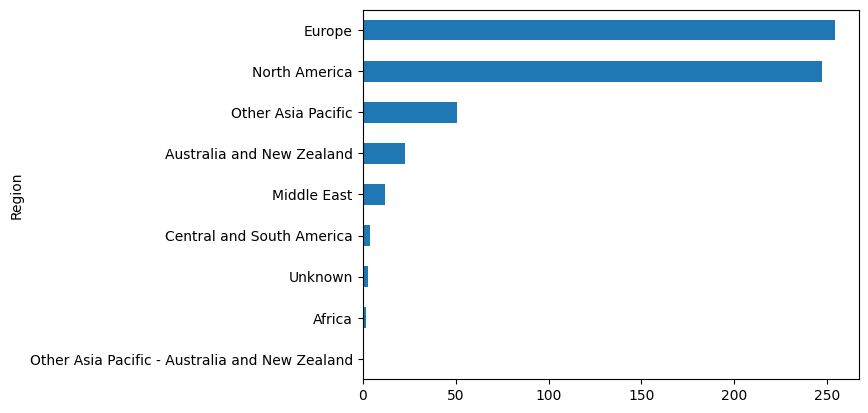

In [167]:
df["Region"].value_counts().sort_values(ascending=True).plot.barh()

<Axes: ylabel='Country'>

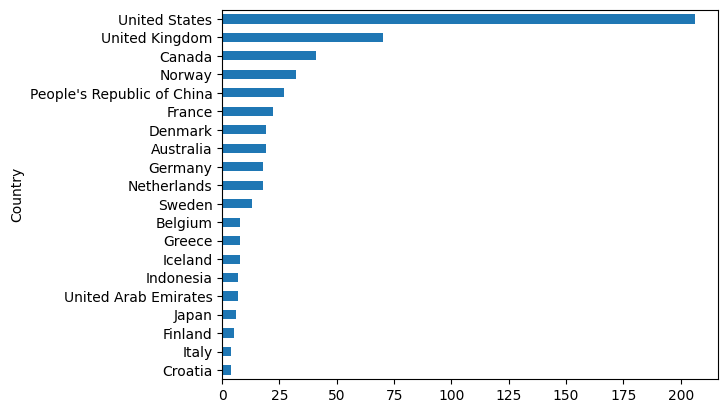

In [158]:
df["Country"].value_counts().sort_values(ascending=True).tail(20).plot.barh()

<Axes: ylabel='Project type'>

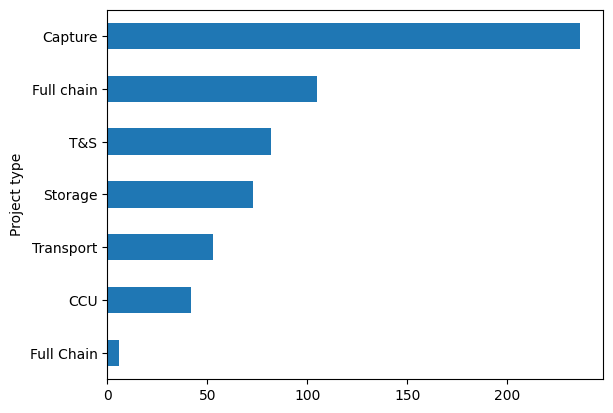

In [157]:
df["Project type"].value_counts().sort_values().plot.barh()

<Axes: xlabel='Project Status'>

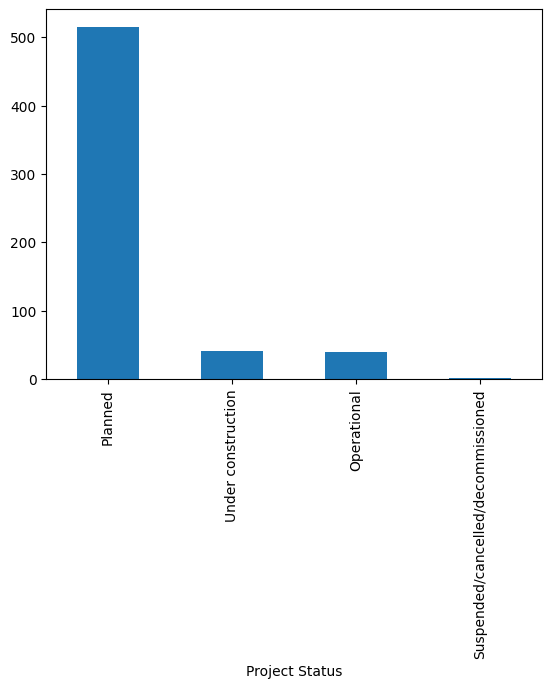

In [161]:
df["Project Status"].value_counts().plot.bar()

<Axes: ylabel='Sector'>

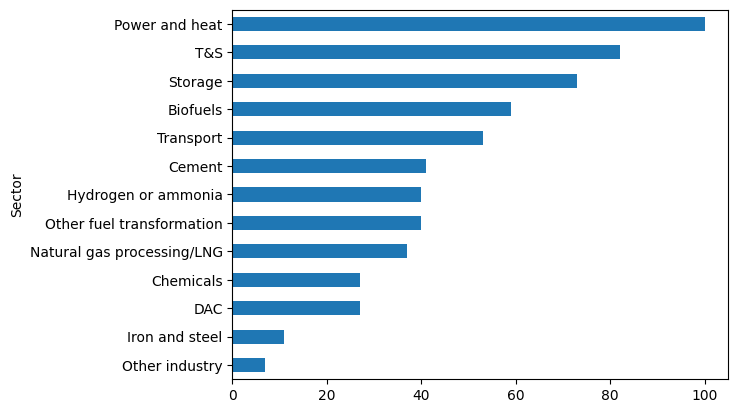

In [163]:
df["Sector"].value_counts().sort_values(ascending=True).plot.barh()

<Axes: xlabel='Fate of carbon'>

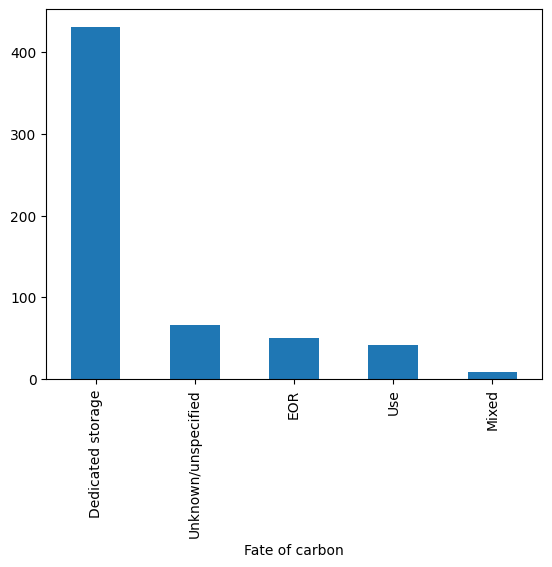

In [166]:
df["Fate of carbon"].value_counts().plot.bar()

With these simple visualizations, we can gather a few insights from the data:

-   extrene majority are just plans
-   extrene majority are in the US, although when separated by region Europe is equivalent to the US
-   extrene majority intend for their carbon to go into dedicated storage
-   most of them are about capture (and not transporting, storing, or using carbon)

We have then the median picture of a CCUS project: a company in Europe or the US that has plans to capture for somebody else to store it.

There should be space, then, for companies to invest in areas other than capture, and to use all the carbon that will be available for storage.

This makes sense considering the US's plan to become an environmental powerhouse (), but it is noticeable that Chinese companies don't seem to want to compete on this front.


### Numerical parameters


-   Announcement
-   Announced capacity (Mt CO2/yr)
-   Estimated capacity by IEA (Mt CO2/yr)
-   Capacity error


In [168]:
# df["Announcement"]
# df["Announced capacity (Mt CO2/yr)"]
# df["Estimated capacity by IEA (Mt CO2/yr)"]
# df["Capacity error"]

<Axes: >

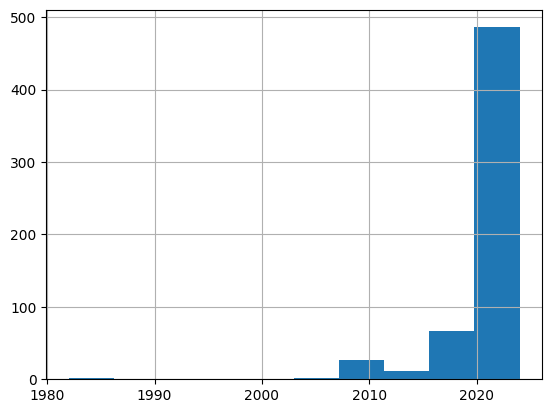

In [195]:
df["Announcement"].hist(bins=10)

<Axes: >

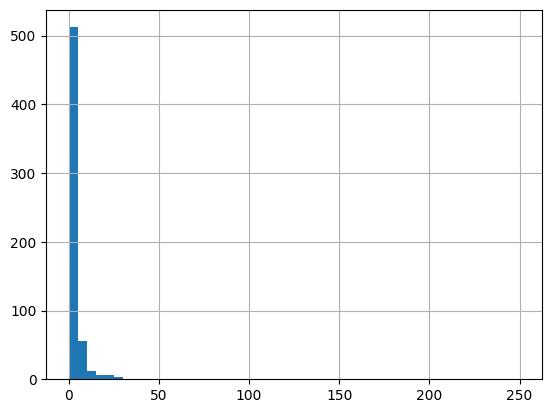

In [194]:
df["Announced capacity (Mt CO2/yr)"].hist(bins=50)

<Axes: >

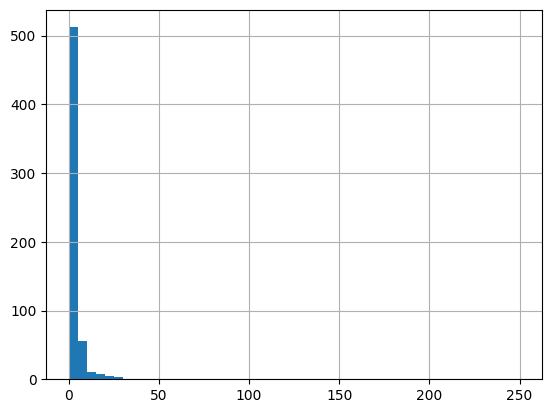

In [183]:
df["Estimated capacity by IEA (Mt CO2/yr)"].hist(bins=50)

In [184]:
df["Estimated capacity by IEA (Mt CO2/yr)"].sort_values()

28       0.001
784      0.001
662      0.001
692      0.002
191      0.004
        ...   
794     30.000
773     30.000
319     40.000
676    120.000
635    250.000
Name: Estimated capacity by IEA (Mt CO2/yr), Length: 597, dtype: float64

<Axes: >

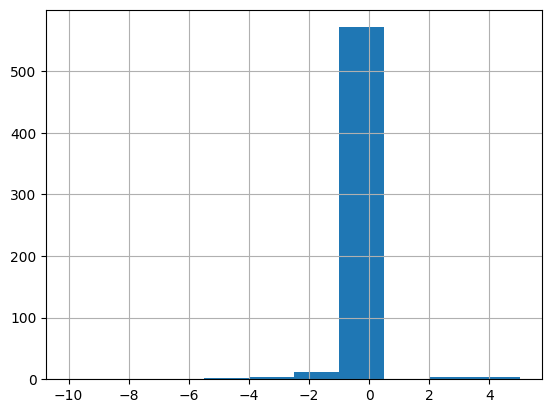

In [187]:
df["Capacity error"].hist(bins=10)

In [189]:
# TODO: make these viz more readablez

### Outliers


The data continues being homogenous: more than 500 out of 600 projects were announced after 2020, are small scale, and do not diverge from the estimate. Given the kind of data this is, it might be interesting to investigate what makes the outliers special.

-   There is 01 project in africa
-   There were a few projects before 2010
-   there are two big ones
    -   676 635

One might also wonder if you are the second company in africa, making another of these 500 companies has any value.


## Additional statistical parameters


I see no reason to diverge from the traditional 5% threshold for discerment.

## Statistical tests


In [87]:
# import statsmodels.stats.weightstats as st

# # df["city_mpg"]
# # df["transmission"]

# a = st.DescrStatsW(df[df["transmission"] == "A"]["city_mpg"])
# m = st.DescrStatsW(df[df["transmission"] == "M"]["city_mpg"])
# cm = st.CompareMeans(a, m)
# ht = cm.ttest_ind(alternative="two-sided")
# print("p value = ", ht[1])

## Inference


Reject the null hypothesis since p < 0.5.

Automatic cars seem to be less efficient
